## Reading in a short story as text sample into Python.

## Step 1: Creating Tokens

<div class="alert alert-block alert-success">

The print command prints the total number of characters followed by the first 100
characters of this file for illustration purposes. </div>

In [1]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
    
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


<div class="alert alert-block alert-success">

Our goal is to tokenize this 20,479-character short story into individual words and special
characters that we can then turn into embeddings for LLM training  </div>

<div class="alert alert-block alert-warning">

Note that it's common to process millions of articles and hundreds of thousands of
books -- many gigabytes of text -- when working with LLMs. However, for educational
purposes, it's sufficient to work with smaller text samples like a single book to
illustrate the main ideas behind the text processing steps and to make it possible to
run it in reasonable time on consumer hardware. </div>

<div class="alert alert-block alert-success">

How can we best split this text to obtain a list of tokens? For this, we go on a small
excursion and use Python's regular expression library re for illustration purposes. (Note
that you don't have to learn or memorize any regular expression syntax since we will
transition to a pre-built tokenizer later in this chapter.) </div>

<div class="alert alert-block alert-warning">

Using some simple example text, we can use the re.split command with the following
syntax to split a text on whitespace characters:</div>

In [2]:
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


<div class="alert alert-block alert-info">
The result is a list of individual words, whitespaces, and punctuation characters:
</div>


<div class="alert alert-block alert-warning">

Let's modify the regular expression splits on whitespaces (\s) and commas, and periods
([,.]):</div>

In [3]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


<div class="alert alert-block alert-info">
We can see that the words and punctuation characters are now separate list entries just as
we wanted
</div>


<div class="alert alert-block alert-warning">

A small remaining issue is that the list still includes whitespace characters. Optionally, we
can remove these redundant characters safely as follows:</div>

In [4]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


<div class="alert alert-block alert-success">

REMOVING WHITESPACES OR NOT


When developing a simple tokenizer, whether we should encode whitespaces as
separate characters or just remove them depends on our application and its
requirements. Removing whitespaces reduces the memory and computing
requirements. However, keeping whitespaces can be useful if we train models that
are sensitive to the exact structure of the text (for example, Python code, which is
sensitive to indentation and spacing). Here, we remove whitespaces for simplicity
and brevity of the tokenized outputs. Later, we will switch to a tokenization scheme
that includes whitespaces.

</div>

<div class="alert alert-block alert-warning">

The tokenization scheme we devised above works well on the simple sample text. Let's
modify it a bit further so that it can also handle other types of punctuation, such as
question marks, quotation marks, and the double-dashes we have seen earlier in the first
100 characters of Edith Wharton's short story, along with additional special characters: </div>

In [5]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [6]:
# Strip whitespace from each item and then filter out any empty strings.
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [8]:
text = "Hello, world. Is this-- a test? I am Saby"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?', 'I', 'am', 'Saby']


<div class="alert alert-block alert-success">

Now that we got a basic tokenizer working, let's apply it to Edith Wharton's entire short
story:

</div>

In [9]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [10]:
print(len(preprocessed))


4690


## Step 2: Creating Token IDs

<div class="alert alert-block alert-warning">

In the previous section, we tokenized Edith Wharton's short story and assigned it to a
Python variable called preprocessed. Let's now create a list of all unique tokens and sort
them alphabetically to determine the vocabulary size:</div>

In [11]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

1130


<div class="alert alert-block alert-success">

After determining that the vocabulary size is 1,130 via the above code, we create the
vocabulary and print its first 51 entries for illustration purposes:

</div>

In [12]:
vocab = {token:integer for integer,token in enumerate(all_words)}


In [13]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


<div class="alert alert-block alert-info">
As we can see, based on the output above, the dictionary contains individual tokens
associated with unique integer labels. 
</div>

<div class="alert alert-block alert-success">

Later in this book, when we want to convert the outputs of an LLM from numbers back into
text, we also need a way to turn token IDs into text. 

For this, we can create an inverse
version of the vocabulary that maps token IDs back to corresponding text tokens.

</div>

<div class="alert alert-block alert-success">

Let's implement a complete tokenizer class in Python.

The class will have an encode method that splits
text into tokens and carries out the string-to-integer mapping to produce token IDs via the
vocabulary. 

In addition, we implement a decode method that carries out the reverse
integer-to-string mapping to convert the token IDs back into text.

</div>

<div class="alert alert-block alert-info">
    
Step 1: Store the vocabulary as a class attribute for access in the encode and decode methods
    
Step 2: Create an inverse vocabulary that maps token IDs back to the original text tokens

Step 3: Process input text into token IDs

Step 4: Convert token IDs back into text

Step 5: Replace spaces before the specified punctuation

</div>



In [14]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
                                
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

<div class="alert alert-block alert-success">

Let's instantiate a new tokenizer object from the SimpleTokenizerV1 class and tokenize a
passage from Edith Wharton's short story to try it out in practice:
</div>

In [15]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know," 
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


<div class="alert alert-block alert-info">
    
The code above prints the following token IDs:
Next, let's see if we can turn these token IDs back into text using the decode method:
</div>

In [16]:
tokenizer.decode(ids)


'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

<div class="alert alert-block alert-info">
    
Based on the output above, we can see that the decode method successfully converted the
token IDs back into the original text.
</div>

<div class="alert alert-block alert-success">

So far, so good. We implemented a tokenizer capable of tokenizing and de-tokenizing
text based on a snippet from the training set. 

Let's now apply it to a new text sample that
is not contained in the training set:
</div>

In [18]:
text = "Hello, do you like saby?"
print(tokenizer.encode(text))

KeyError: 'Hello'

<div class="alert alert-block alert-info">
    
The problem is that the word "Hello" was not used in the The Verdict short story. 

Hence, it
is not contained in the vocabulary. 

This highlights the need to consider large and diverse
training sets to extend the vocabulary when working on LLMs.

</div>

### ADDING SPECIAL CONTEXT TOKENS

In the previous section, we implemented a simple tokenizer and applied it to a passage
from the training set. 

In this section, we will modify this tokenizer to handle unknown
words.


In particular, we will modify the vocabulary and tokenizer we implemented in the
previous section, SimpleTokenizerV2, to support two new tokens, <|unk|> and
<|endoftext|>

<div class="alert alert-block alert-warning">

We can modify the tokenizer to use an <|unk|> token if it
encounters a word that is not part of the vocabulary. 

Furthermore, we add a token between
unrelated texts. 

For example, when training GPT-like LLMs on multiple independent
documents or books, it is common to insert a token before each document or book that
follows a previous text source

</div>



<div class="alert alert-block alert-success">

Let's now modify the vocabulary to include these two special tokens, <unk> and
<|endoftext|>, by adding these to the list of all unique words that we created in the
previous section:
</div>

In [19]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [20]:
len(vocab.items())


1132

<div class="alert alert-block alert-info">
    
Based on the output of the print statement above, the new vocabulary size is 1132 (the
vocabulary size in the previous section was 1130).

</div>



<div class="alert alert-block alert-success">

As an additional quick check, let's print the last 5 entries of the updated vocabulary:
</div>

In [21]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


<div class="alert alert-block alert-success">

A simple text tokenizer that handles unknown words</div>



<div class="alert alert-block alert-info">
    
Step 1: Replace unknown words by <|unk|> tokens
    
Step 2: Replace spaces before the specified punctuations

</div>


In [22]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int 
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [23]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [24]:
tokenizer.encode(text)


[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [25]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'


<div class="alert alert-block alert-info">
    
Based on comparing the de-tokenized text above with the original input text, we know that
the training dataset, Edith Wharton's short story The Verdict, did not contain the words
"Hello" and "palace."

</div>


<div class="alert alert-block alert-warning">

So far, we have discussed tokenization as an essential step in processing text as input to
LLMs. Depending on the LLM, some researchers also consider additional special tokens such
as the following:

[BOS] (beginning of sequence): This token marks the start of a text. It
signifies to the LLM where a piece of content begins.

[EOS] (end of sequence): This token is positioned at the end of a text,
and is especially useful when concatenating multiple unrelated texts,
similar to <|endoftext|>. For instance, when combining two different
Wikipedia articles or books, the [EOS] token indicates where one article
ends and the next one begins.

[PAD] (padding): When training LLMs with batch sizes larger than one,
the batch might contain texts of varying lengths. To ensure all texts have
the same length, the shorter texts are extended or "padded" using the
[PAD] token, up to the length of the longest text in the batch.

</div>


<div class="alert alert-block alert-warning">

Note that the tokenizer used for GPT models does not need any of these tokens mentioned
above but only uses an <|endoftext|> token for simplicity

</div>

<div class="alert alert-block alert-warning">

the tokenizer used for GPT models also doesn't use an <|unk|> token for outof-vocabulary words. Instead, GPT models use a byte pair encoding tokenizer, which breaks
down words into subword units
</div>

### BYTE PAIR ENCODING


**BPE Tokenizer**

In [26]:
! pip3 install tiktoken

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.7 MB/s eta 0:00:00
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2025.4.26-py3-none-any.whl (159 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.4.0-py3-none-any.whl (128 kB)


In [27]:
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.9.0


In [28]:
tokenizer = tiktoken.get_encoding("gpt2")

In [30]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [32]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


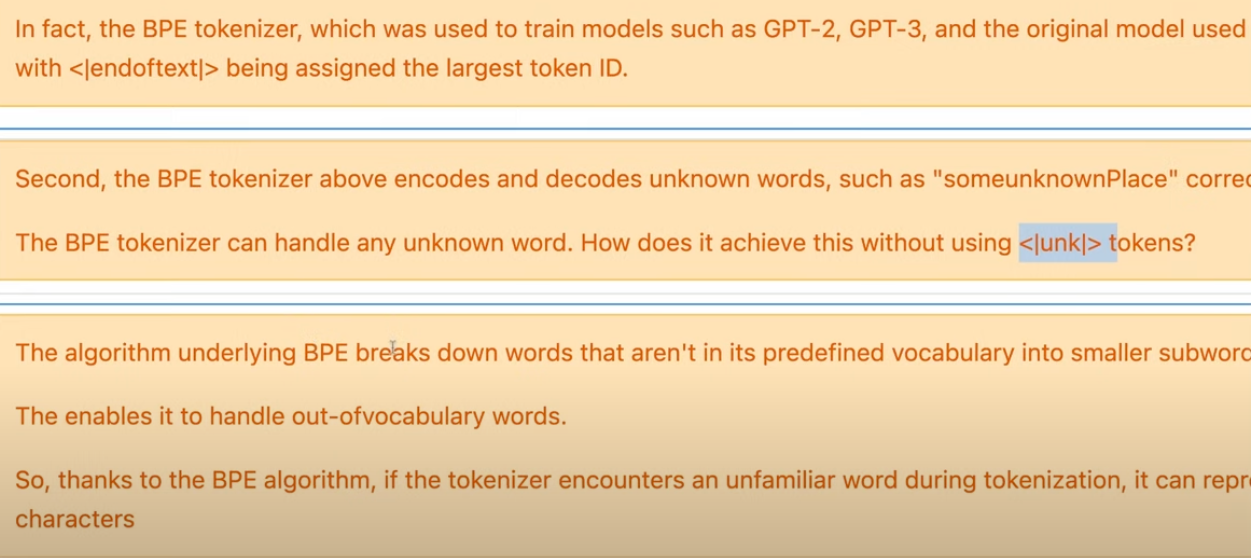

**Exercise 2.1**

In [33]:
integers = tokenizer.encode("Akwirw ier")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


**Data sampling with sliding window**

In [35]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [36]:
enc_sample = enc_text[50:]


In [30]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [31]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [32]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


**IMPLEMENTING A DATA LOADER**

In [33]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [34]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, 
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [35]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [36]:
import torch
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.3.0
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [37]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [38]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


**CREATE TOKEN EMBEDDINGS**

In [39]:
input_ids = torch.tensor([2, 3, 5, 1])


In [40]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [41]:
print(embedding_layer.weight)


Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [42]:
print(embedding_layer(torch.tensor([3])))


tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [43]:
print(embedding_layer(input_ids))


tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


**POSITIONAL EMBEDDINGS (ENCODING WORD POSITIONS)**

In [44]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [45]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [46]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [47]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [48]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [49]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [50]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])
